<a href="https://colab.research.google.com/github/pragyansharma24/Gun-Violence-in-United-States/blob/master/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration - Guv Violence in USA

In [0]:
import pandas as pd
import numpy as np

## City Crime 

#### Introduction:

#### Key variables:
-- 


#### The dataset needs some preparation before we start exploring and visualizing the dataset further. In order to do so:
- Column names will be replaced with shorter names 
- 'NAs' will be removed
- Merging with latitude and longitude

In [0]:
a = 'https://github.com/pragyansharma24/Gun-Violence-in-United-States/blob/master/datasets/Gun-Violence-in-United-States/developed.csv'

In [0]:
df = pd.read_csv(a)

HTTPError: ignored

In [0]:
# Renaming columns
mass_shoot.rename(columns={'Incident Date':'Date','City Or County':'City', '# Killed':'num_Killed', '# Injured':'num_Injured'}, inplace=True)
mass_shoot.head()

,Date,State,City,Address,num_Killed,num_Injured,Operations
0,"December 31, 2013",New York,Brooklyn,60 Glenmore Ave,0,6,NaN
1,"December 28, 2013",Alabama,Montgomery,954 Highland Ave,3,5,NaN
2,"December 26, 2013",Louisiana,Slidell,2144 First St,2,6,NaN
3,"December 26, 2013",Louisiana,Lockport,313 Tenth St,3,3,NaN
4,"December 25, 2013",New Jersey,Irvington,Nye Avenue and 21st Street,3,2,NaN


In [0]:
len(mass_shoot)

2056

In [0]:
# Reading in data for latitudes and longitudes for all the cities in US
cities = pd.read_csv("uscitiesv1.5.csv")
cities_sub = cities[['city','state_id', 'state_name','lat', 'lng']]
cities_sub.head()

,city,state_id,state_name,lat,lng
0,Prairie Ridge,WA,Washington,47.1443,-122.1408
1,Edison,WA,Washington,48.5602,-122.4311
2,Packwood,WA,Washington,46.6085,-121.6702
3,Wautauga Beach,WA,Washington,47.5862,-122.5482
4,Harper,WA,Washington,47.5207,-122.5196


In [0]:
# Merging data for mass shootings and location data for cities
city_data = mass_shoot.merge(cities_sub,how='left', left_on=['City', 'State'], right_on=['city', 'state_name'])
city_data.head()

,Date,State,City,Address,num_Killed,num_Injured,Operations,city,state_id,state_name,lat,lng
0,"December 31, 2013",New York,Brooklyn,60 Glenmore Ave,0,6,NaN,Brooklyn,NY,New York,40.6501,-73.9496
1,"December 28, 2013",Alabama,Montgomery,954 Highland Ave,3,5,NaN,Montgomery,AL,Alabama,32.3470,-86.2663
2,"December 26, 2013",Louisiana,Slidell,2144 First St,2,6,NaN,Slidell,LA,Louisiana,30.2882,-89.7826
3,"December 26, 2013",Louisiana,Lockport,313 Tenth St,3,3,NaN,Lockport,LA,Louisiana,29.6418,-90.5376
4,"December 25, 2013",New Jersey,Irvington,Nye Avenue and 21st Street,3,2,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
city_data.drop(columns=['Operations', 'city', 'state_name','state_id'], inplace=True)

In [0]:
len(city_data)

2056

In [0]:
# Checking for NAs
city_data.isna().sum()

Date             0
State            0
City             0
Address          8
num_Killed       0
num_Injured      0
lat            134
lng            134
dtype: int64

In [0]:
city_data = city_data.dropna()
city_data.head()

,Date,State,City,Address,num_Killed,num_Injured,lat,lng
0,"December 31, 2013",New York,Brooklyn,60 Glenmore Ave,0,6,40.6501,-73.9496
1,"December 28, 2013",Alabama,Montgomery,954 Highland Ave,3,5,32.3470,-86.2663
2,"December 26, 2013",Louisiana,Slidell,2144 First St,2,6,30.2882,-89.7826
3,"December 26, 2013",Louisiana,Lockport,313 Tenth St,3,3,29.6418,-90.5376
5,"December 25, 2013",New York,Medford,33A Cedarhurst Ave,1,3,40.8220,-72.9859


### Appplication

## World Crime

#### The dataset needs some preparation before we start exploring and visualizing the dataset further. In order to do so:
- Column names will be replaced with shorter names 
- 'NA' will be removed 


In [0]:
# Reading in data for world crimes
world_crime = pd.read_csv("world_crime.csv")
world_crime.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [0]:
# Creating a new list of column names
cols = ['Country', 'Country_code', 'Source', '%_homi_gun', 'num_homi_gun', 'homi_gun_per100k', 'rank-rate_owner',\
        'avg_gun_per100', 'avg_tot_all_guns']

In [0]:
# Replacing the existing column names with new names saved in the list 'cols'
world_crime.columns = cols

In [0]:
world_crime.head()

,Country,Country_code,Source,%_homi_gun,num_homi_gun,homi_gun_per100k,rank-rate_owner,avg_gun_per100,avg_tot_all_guns
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [0]:
len(world_crime)

185

In [0]:
# Checking columns with 'NA' values
world_crime.isna().sum()

Country              0
Country_code         1
Source              69
%_homi_gun          69
num_homi_gun        69
homi_gun_per100k    69
rank-rate_owner      9
avg_gun_per100       9
avg_tot_all_guns     9
dtype: int64

In [0]:
# Removing all the 'NA' values
world_crime = world_crime.dropna()

In [0]:
len(world_crime)

107

In [0]:
# Reading in data for growth rates for all 'Developed' countries
country_index = pd.read_csv("developed.csv")
country_index.head()

,cca2,name,area,pop2019,GrowthRate
0,US,United States,9372610,329093.110,1.007119
1,JP,Japan,377930,126854.745,0.997401
2,TR,Turkey,783562,82961.805,1.012756
3,DE,Germany,357114,82438.639,1.001764
4,GB,United Kingdom,242900,66959.016,1.005791


In [0]:
# Checking for NAs
country_index.isna().sum()

cca2          0
name          0
area          0
pop2019       0
GrowthRate    0
dtype: int64

In [0]:
# Merging world crimes and growth rates dataset
world_data = world_crime.merge(country_index, how="inner", left_on="Country", right_on="name")
world_data.head()

,Country,Country_code,Source,%_homi_gun,num_homi_gun,homi_gun_per100k,rank-rate_owner,avg_gun_per100,avg_tot_all_guns,cca2,name,area,pop2019,GrowthRate
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,AU,Australia,7692024,25088.636,1.012772
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,AT,Austria,83871,8766.201,1.001643
2,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,BE,Belgium,30528,11562.784,1.005589
3,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,CA,Canada,9984670,37279.811,1.008823
4,Cyprus,CY,CTS,26.3,5.0,0.46,6.0,36.4,275000.0,CY,Cyprus,9251,1198.427,1.007856


### Application

### Graph1: Homicides by firearm per 1 million people

In [0]:
# Creating a new metric for homicides by firearm per 1 million people
world_data['homi_gun_per1M'] = world_data['homi_gun_per100k'] / 10

In [0]:
world_data.head()

,Country,Country_code,Source,%_homi_gun,num_homi_gun,homi_gun_per100k,rank-rate_owner,avg_gun_per100,avg_tot_all_guns,cca2,name,area,pop2019,GrowthRate,homi_gun_per1M
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,AU,Australia,7692024,25088.636,1.012772,0.014
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,AT,Austria,83871,8766.201,1.001643,0.022
2,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,BE,Belgium,30528,11562.784,1.005589,0.068
3,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,CA,Canada,9984670,37279.811,1.008823,0.051
4,Cyprus,CY,CTS,26.3,5.0,0.46,6.0,36.4,275000.0,CY,Cyprus,9251,1198.427,1.007856,0.046


In [0]:
import matplotlib.pyplot as plt

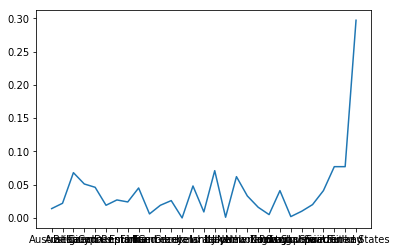

In [0]:
plt.plot(world_data['Country'].values, world_data['homi_gun_per1M'].values)    
plt.show()